In [44]:
import pandas as pd

In [45]:
train = pd.read_csv("train.csv")

In [46]:
train['label_2'].fillna(train['label_2'].mean(), inplace=True)

In [47]:
train['label_2'] = train['label_2'].astype(int)

In [48]:
train.dropna(subset=['label_4'], inplace=True)

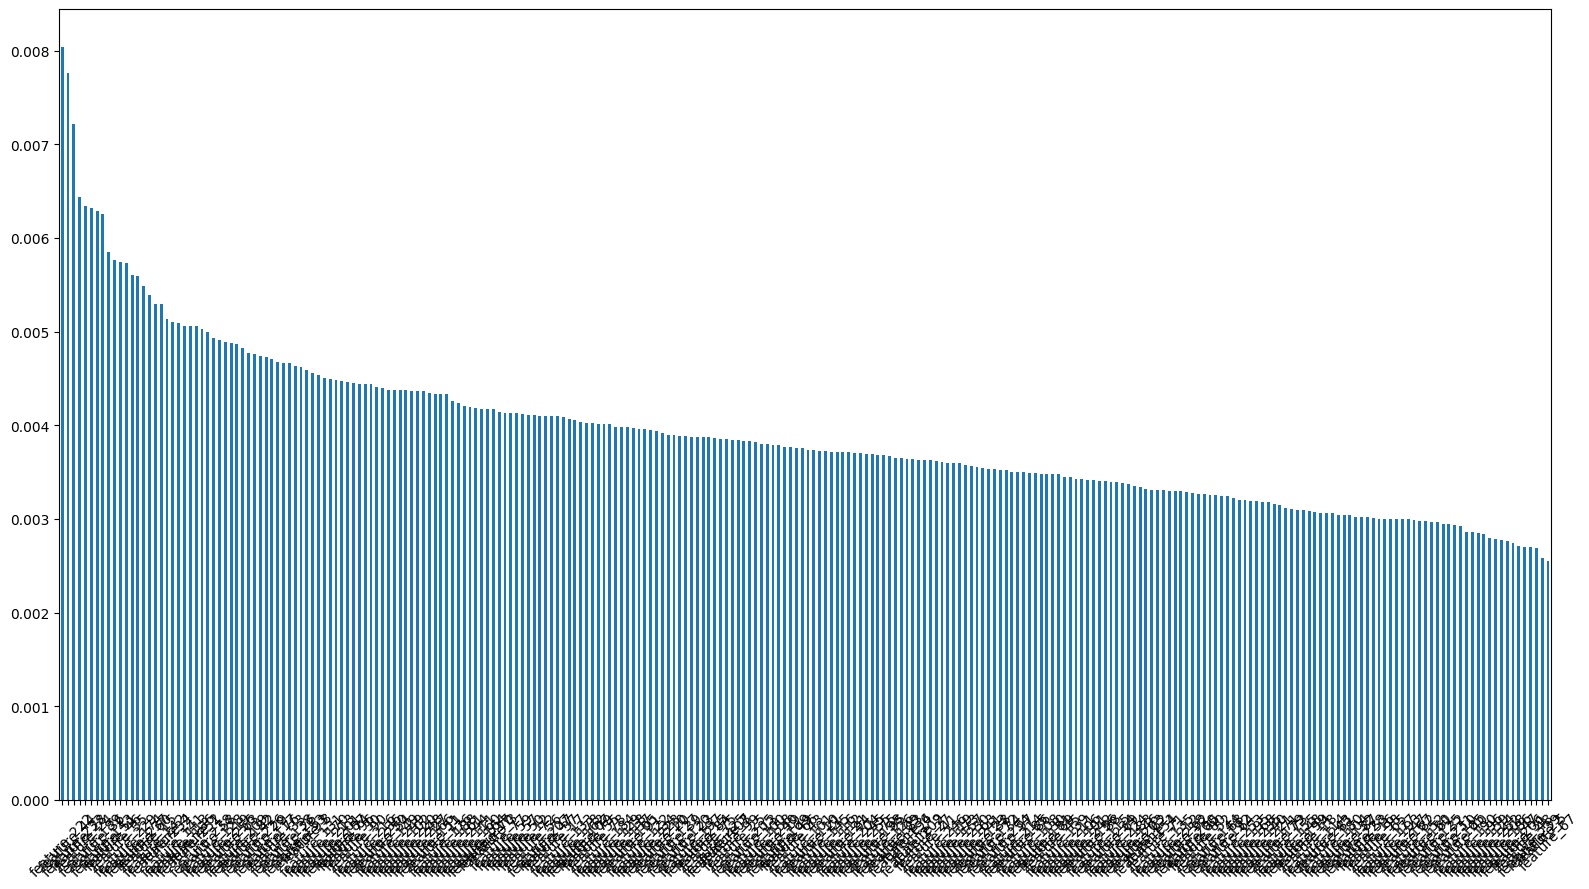

In [49]:
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

X = train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y = train['label_2']

clf = RandomForestClassifier()
clf.fit(X, y)

importances = clf.feature_importances_

f_importances = pd.Series(importances, X.columns)

f_importances.sort_values(ascending=False, inplace=True)

f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45)

plt.tight_layout()
plt.show()


In [50]:
importances = clf.feature_importances_

f_importances = pd.Series(importances, X.columns)

f_importances.sort_values(ascending=False, inplace=True)

threshold = 0.004

selected_features = f_importances[f_importances > threshold]

X_selected = X[selected_features.index]

In [51]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
def separate_dataset(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

def train_model(X_train, y_train):
    model = svm.SVC(random_state=42)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, X_test, y_train, y_test):
    print(f"Training score: {model.score(X_train, y_train)}")
    print(f"Testing score: {model.score(X_test, y_test)}")

def evaluate_model_detailed(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [53]:
X_train, X_test, y_train, y_test = separate_dataset(X_selected, y)

In [54]:
model2 = train_model(X_train, y_train)

In [55]:
evaluate_model(model2, X_train, X_test, y_train, y_test)

Training score: 0.9713985173311962
Testing score: 0.9509116409537167


In [56]:
evaluate_model_detailed(model2, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

          22       0.96      0.96      0.96       447
          23       0.93      0.93      0.93       863
          24       0.92      0.93      0.93       561
          25       0.94      0.95      0.94       834
          26       0.93      0.97      0.95      1431
          27       0.95      0.95      0.95      1007
          28       0.95      0.95      0.95       573
          29       0.96      0.94      0.95       428
          30       0.97      0.93      0.95       596
          31       0.96      0.92      0.94       678
          32       1.00      0.99      0.99       146
          33       0.98      0.97      0.98       271
          34       0.99      0.97      0.98       146
          35       1.00      1.00      1.00       141
          36       1.00      0.98      0.99       161
          41       0.98      1.00      0.99       121
          61       0.99      0.99      0.99       152

   

In [57]:
test = pd.read_csv("test.csv")

In [58]:
test = test[test.columns.difference(['label_1', 'label_2', 'label_3', 'label_4'])]

In [59]:
test = test[selected_features.index]

In [60]:
test['label_2'] = model2.predict(test)

In [61]:
test.head()

,feature_222,feature_44,feature_233,feature_28,feature_24,feature_189,feature_36,feature_143,feature_51,feature_46,...,feature_133,feature_178,feature_162,feature_107,feature_79,feature_55,feature_78,feature_184,feature_129,label_2
0,-2.488485,-2.880708,-0.037238,0.480986,-2.638312,-2.292039,1.681010,0.188330,-0.789575,0.699177,...,-2.472550,1.545403,0.318311,1.610883,-3.320027,-1.313301,2.850119,1.045662,0.359295,27
1,-0.338778,-1.843359,0.471878,-0.004505,-1.772872,-2.218468,3.269116,1.994243,-0.153646,-1.730403,...,-2.242190,1.245048,-0.582734,-0.096254,-0.696944,0.262073,3.864089,1.983535,1.235932,27
2,-1.267447,-2.667108,0.470122,-0.494594,-0.951068,-1.175321,3.436413,1.326968,0.334342,-0.782798,...,-1.802087,-1.524013,0.574543,-1.366310,-0.386777,0.597548,3.511874,1.242937,1.250186,27
3,-0.362242,-2.529230,1.719265,1.515996,-2.279987,-1.837382,3.524469,2.231530,1.578233,-0.231711,...,-1.960552,0.430722,-1.739311,0.647607,-1.548578,-1.514911,4.790571,0.305000,2.475470,27
4,-1.654874,-1.740185,1.012408,-0.306194,0.288694,-2.691330,1.471479,2.367822,0.524525,-0.354222,...,0.786671,0.499310,0.334848,0.300367,-0.802814,-0.596887,4.214573,2.359740,0.209357,27


In [ ]:
test.to_csv('test_with_predictions_label2.csv', index=False)